In [1]:
import pandas as pd
import os
import glob

In [3]:
# get current working directory and create a variable for the file path
pwd = os.getcwd()
dataFilePath = pwd + '/data/us_equities_news_dataset.csv'
print(dataFilePath)

/home/jovyan/work/data/us_equities_news_dataset.csv


In [69]:
# read in data
data = pd.read_csv(dataFilePath)

In [70]:
# get a summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221513 entries, 0 to 221512
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            221513 non-null  int64 
 1   ticker        221513 non-null  object
 2   title         221513 non-null  object
 3   category      221513 non-null  object
 4   content       221505 non-null  object
 5   release_date  221513 non-null  object
 6   provider      221513 non-null  object
 7   url           221513 non-null  object
 8   article_id    221513 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 15.2+ MB


In [130]:
data['date'] = data['release_date'].apply(lambda x: datetime.datetime.strptime(x,format))

In [71]:
data['ticker'].nunique()

802

In [72]:
start_date = data['release_date'].min()
end_date = data['release_date'].max()
print(start_date,end_date)

2008-10-02 2020-02-13


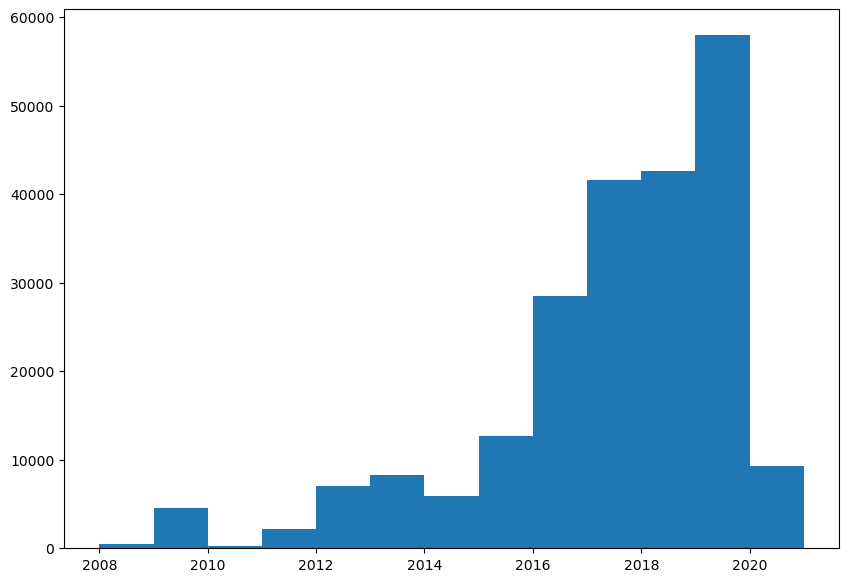

In [73]:
# get an idea for how the news articles are distributed across time

from matplotlib import pyplot as plt
import datetime
format = "%Y-%m-%d"

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data['release_date'].apply(lambda x: datetime.datetime.strptime(x,format).year),bins = [x for x in range(2008,2022)])
 
# Show plot
plt.show()

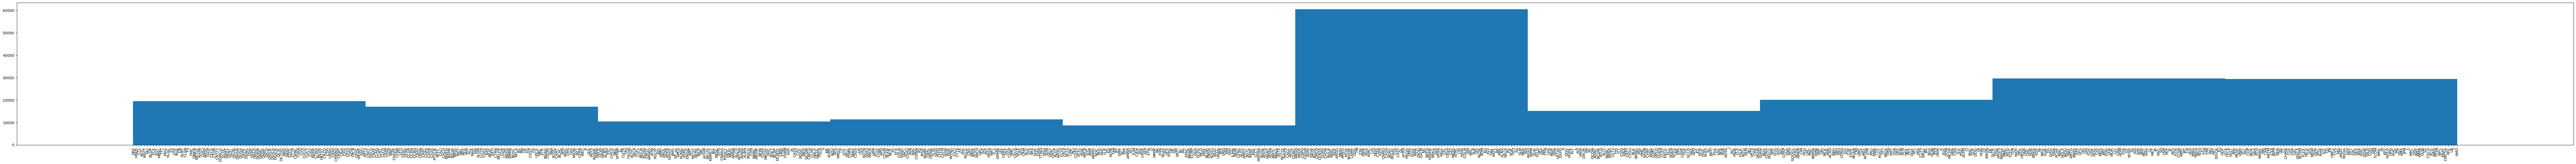

In [62]:
# get a sense for what tickers are in the data set
fig, ax = plt.subplots(figsize =(125, 7))
ax.hist(data['ticker'])
ax.tick_params(axis='x', labelrotation = 90)
# Show plot
plt.show()

In [76]:
# add sentiment score of the data using the title

from textblob import TextBlob
data['title_sentiment'] = data["title"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
# data['content_sentiment'] = data["content"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [146]:
import pandas_datareader as web
def get_ticker_summary(ticker, sent_dataset, start_date, end_date):
    
    fig, ax = plt.subplots(figsize =(30, 7))
    
    price_data = web.DataReader(name=ticker, data_source='yahoo', start=start_date, end=end_date)
    
    ticker_sent = sent_dataset[sent_dataset['ticker'].str.contains(ticker)].loc[:,['date','title_sentiment']]
    ticker_sent =
    #ticker_sent = ticker_sent.set_index('date')

    close = price_data['Close']
    
    ax = close.plot(title=ticker, color= 'green')
    ax.tick_params(axis='y', labelcolor='green')
    
    
    # Generate a new Axes instance, on the twin-X axes (same position)
    ax2 = ax.twinx()

    # Plot exponential sequence, set scale to logarithmic and change tick color
    ax2.scatter(ticker_sent['date'],ticker_sent['title_sentiment'], color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    
    plt.show()
    


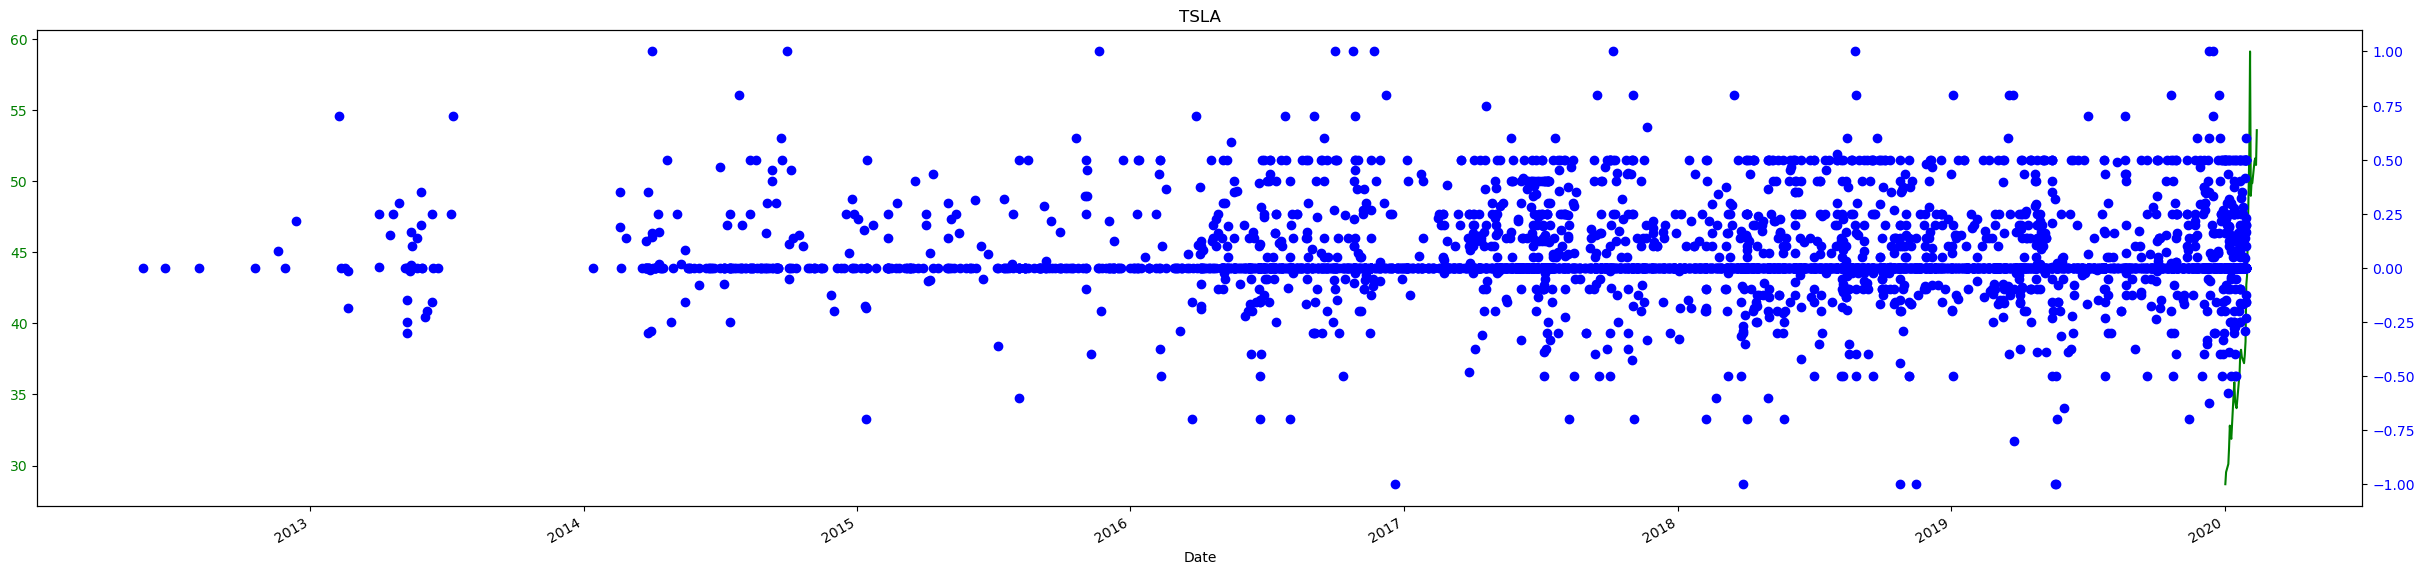

In [149]:
get_ticker_summary('TSLA',data,datetime.datetime.strptime('2020-01-01',format) ,end_date)

,release_date,title_sentiment
7191,2020-01-22,-0.100000
7192,2020-01-22,0.142857
7193,2020-01-22,0.000000
7194,2020-01-23,0.000000
7199,2020-01-20,0.000000
...,...,...
75524,2013-05-16,0.166667
75525,2013-05-16,0.014815
75526,2014-01-14,0.000000
75527,2014-02-18,0.350000
